# Deep Q-network

In [1]:
import gym
import tensorflow
from matplotlib import pyplot
import dqn

/home/podondra/gym-rl/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
env = gym.make('Breakout-v0')
env.action_space, env.observation_space
# env.observation_space.low, env.observation_space.high

(Discrete(4), Box(210, 160, 3))

In [3]:
env.env.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

In [4]:
env.reset()
for _ in range(100):
    env.render()
    # take a random action
    _, _, done, _ = env.step(env.action_space.sample())
    if done:
        break
env.render(close=True)

(210, 160, 3)

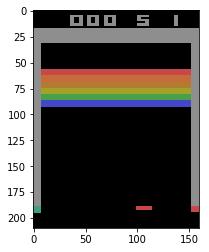

In [5]:
S = env.reset()
pyplot.imshow(S)
S.shape

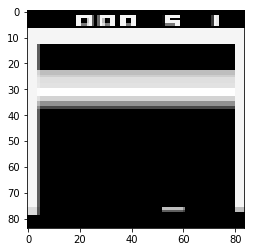

In [6]:
preprocess = dqn.Preprocessor()
sess = tensorflow.InteractiveSession()
theta = preprocess(S, sess)
pyplot.imshow(theta.reshape(84, 84), cmap='gray')

In [ ]:
def deep_q_learning(env, time_steps):
    C = 10000  # target network update frequency
    time_steps_counter = range(1, time_steps + 1)
    preprocess = dqn.Preprocessor()

    # initialize replay memory
    replay_memory = ReplayMemory()
    # initialize action-value function with random weights
    Q = DQN(env)
    # intialize taget action-value function
    target_Q = DQN(env, Q.clone_weights())
    for episode in itertools.count():
        # intialize sequence
        S = env.reset()
        theta = preprocess(S)
        for t in time_step_counter:
            # choose epsilon greedy action
            A = Q.epsilon_greedy_action()
            # execute action in emulator and observe reward and image
            S_next, R, done, _ = env.step(A)
            theta_next = preprocess(S_next)
            # store transition in replay memory
            replay_memory.store(theta, A, R, theta_next)
            # sample minibatch from replay memory
            transitions = replay_memory.sample_minibatch()
            # set y
            ys = target_Q.get_q_update(transitions)
            # perform gradient descent step
            Q.gradient_descent_step(ys)
            # every C steps reset target_Q = Q
            if time_step_counter % C == 0:
                target_Q.weights = Q.clone_weights()
            if done:
                break
            S, theta = S_next, theta_next

dqn.deep_q_learning(env, 100)